In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.float_format', lambda x: '%.2f' %x)

olympics = pd.read_csv('/Users/luciomuramatsu/Google Drive/Code/python/DataScience/dataOlympics/olympics_events.csv')

In [2]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
olympics.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [180]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.00,261642.00,210945.00,208241.00,271116.00
mean,68248.95,25.56,175.34,70.70,1978.38
std,39022.29,6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,1896.00
25%,34643.00,21.00,168.00,60.00,1960.00
50%,68205.00,24.00,175.00,70.00,1988.00
75%,102097.25,28.00,183.00,79.00,2002.00
max,135571.00,97.00,226.00,214.00,2016.00


In [5]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Number of entries for summer events only.

In [9]:
sports_count = pysqldf('''
SELECT 
    Sport,
    COUNT(Sport) Count
FROM olympics 
WHERE 
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
    AND 
    Season = 'Summer'
GROUP BY Sport
ORDER BY Count DESC
;
''')

sports_count

,Sport,Count
0,Athletics,32374
1,Swimming,18776
2,Gymnastics,18271
3,Rowing,7790
4,Cycling,7775
5,Shooting,7260
6,Fencing,6537
7,Canoeing,5550
8,Wrestling,5186
9,Sailing,4863


## Analyse by 3 groups. Team sports, weight division sports and event-based sports.

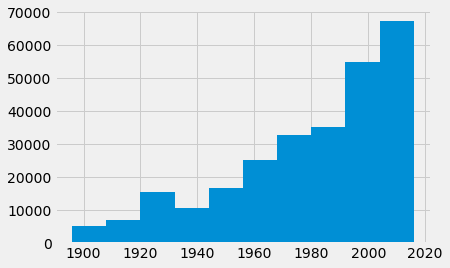

In [181]:
olympics.Year.hist()

In [14]:
team_sports = ['Football', 'Hockey', 'Basketball', 'Handball', 'Volleyball', 'Water Polo',
               'Synchronized Swimming', 'Baseball']
weight_division_sports = ['Wrestling', 'Boxing', 'Judo', 'Taekwondo', 'Weightlifting']
individual_sports = ['Athletics', 'Swimming', 'Gymnastics', 'Rowing', 'Cycling', 'Shooting', 'Fencing', 
                     'Canoeing', 'Sailing', 'Equestrianism', 'Diving', 'Archery', 'Tennis', 'Triathlon']

## Create table with all entries for each group.
### Excluding entry when age, weight or height is null
### Selecting only entries from 1960 or older (small data before 1960)
### Calculating BMI (Weight/ Height ˆ 2)
### Two aditional columns for medals. Boolean (Any medal = True, No medal = False) and numeric points (Gold = 3, Silver = 2, Bronze = 1)

In [174]:
team_table_M = pysqldf('''
SELECT 
    Id,
    Sex,
    Team,
    Age,
    Height,
    Weight,
    (weight / ((height/100)*(height/100))) AS BMI,
    Year,
    Sport,
    Event,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 2
        WHEN Medal = 'Gold' THEN 3
        ELSE 0
        END AS Medal_num,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 1
        WHEN Medal = 'Gold' THEN 1
        ELSE 0
        END AS Medal_bool
        
FROM olympics 
WHERE 
    Sport IN ('Football', 'Hockey', 'Basketball', 'Handball', 'Volleyball', 'Water Polo',
               'Synchronized Swimming', 'Baseball')
    AND
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
    AND 
    Year IS NOT NULL
    AND 
    Year >= 1960
    AND 
    Sex = 'M'
;
''')

team_table_M.head()

,ID,Sex,Team,Age,Height,Weight,BMI,Year,Sport,Event,Medal_num,Medal_bool
0,1,M,China,24.00,180.00,80.00,24.69,1992,Basketball,Basketball Men's Basketball,0,0
1,61,M,Bulgaria,26.00,175.00,72.00,23.51,1960,Football,Football Men's Football,0,0
2,73,M,France,23.00,182.00,86.00,25.96,2008,Handball,Handball Men's Handball,3,1
3,73,M,France,27.00,182.00,86.00,25.96,2012,Handball,Handball Men's Handball,3,1
4,73,M,France,31.00,182.00,86.00,25.96,2016,Handball,Handball Men's Handball,2,1


In [175]:
team_table_F = pysqldf('''
SELECT 
    Id,
    Sex,
    Team,
    Age,
    Height,
    Weight,
    (weight / ((height/100)*(height/100))) AS BMI,
    Year,
    Sport,
    Event,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 2
        WHEN Medal = 'Gold' THEN 3
        ELSE 0
        END AS Medal_num,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 1
        WHEN Medal = 'Gold' THEN 1
        ELSE 0
        END AS Medal_bool
        
FROM olympics 
WHERE 
    Sport IN ('Football', 'Hockey', 'Basketball', 'Handball', 'Volleyball', 'Water Polo',
               'Synchronized Swimming', 'Baseball')
    AND
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
    AND 
    Year IS NOT NULL
    AND 
    Year >= 1960
    AND 
    Sex = 'F'
;
''')

team_table_F.head()

,ID,Sex,Team,Age,Height,Weight,BMI,Year,Sport,Event,Medal_num,Medal_bool
0,37,F,Norway,23.00,182.00,64.00,19.32,1996,Football,Football Women's Football,1,1
1,69,F,Spain,19.00,185.00,72.00,21.04,2008,Basketball,Basketball Women's Basketball,0,0
2,132,F,Italy,28.00,171.00,64.00,21.89,2012,Water Polo,Water Polo Women's Water Polo,0,0
3,135,F,Netherlands,23.00,178.00,72.00,22.72,2016,Handball,Handball Women's Handball,0,0
4,159,F,Egypt,15.00,167.00,60.00,21.51,2008,Synchronized Swimming,Synchronized Swimming Women's Duet,0,0


In [176]:
weight_division_table_M = pysqldf('''
SELECT 
    Id,
    Sex,
    Team,
    Age,
    Height,
    Weight,
    (weight / ((height/100)*(height/100))) AS BMI,
    Year,
    Sport,
    Event,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 2
        WHEN Medal = 'Gold' THEN 3
        ELSE 0
        END AS Medal_num,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 1
        WHEN Medal = 'Gold' THEN 1
        ELSE 0
        END AS Medal_bool
        
FROM olympics 
WHERE 
    Sport IN ('Wrestling', 'Boxing', 'Judo', 'Taekwondo', 'Weightlifting')
    AND
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
    AND 
    Year IS NOT NULL
    AND 
    Year >= 1960
    AND 
    Sex = 'M'
;
''')

weight_division_table_M.head()

,ID,Sex,Team,Age,Height,Weight,BMI,Year,Sport,Event,Medal_num,Medal_bool
0,2,M,China,23.00,170.00,60.00,20.76,2012,Judo,Judo Men's Extra-Lightweight,0,0
1,23,M,Norway,22.00,187.00,89.00,25.45,2000,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",0,0
2,23,M,Norway,26.00,187.00,89.00,25.45,2004,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",0,0
3,50,M,Estonia,22.00,185.00,106.00,30.97,1992,Wrestling,"Wrestling Men's Heavyweight, Freestyle",0,0
4,50,M,Estonia,26.00,185.00,106.00,30.97,1996,Wrestling,"Wrestling Men's Heavyweight, Freestyle",0,0


In [177]:
weight_division_table_F = pysqldf('''
SELECT 
    Id,
    Sex,
    Team,
    Age,
    Height,
    Weight,
    (weight / ((height/100)*(height/100))) AS BMI,
    Year,
    Sport,
    Event,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 2
        WHEN Medal = 'Gold' THEN 3
        ELSE 0
        END AS Medal_num,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 1
        WHEN Medal = 'Gold' THEN 1
        ELSE 0
        END AS Medal_bool
        
FROM olympics 
WHERE 
    Sport IN ('Wrestling', 'Boxing', 'Judo', 'Taekwondo', 'Weightlifting')
    AND
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
    AND 
    Year IS NOT NULL
    AND 
    Year >= 1960
    AND 
    Sex = 'F'
;
''')

weight_division_table_F.head()

,ID,Sex,Team,Age,Height,Weight,BMI,Year,Sport,Event,Medal_num,Medal_bool
0,22,F,Romania,22.00,170.00,125.00,43.25,2016,Weightlifting,Weightlifting Women's Super-Heavyweight,0,0
1,65,F,Azerbaijan,21.00,165.00,49.00,18.00,2016,Taekwondo,Taekwondo Women's Flyweight,1,1
2,131,F,Azerbaijan,33.00,159.00,53.00,20.96,2000,Weightlifting,Weightlifting Women's Featherweight,0,0
3,165,F,United States,20.00,175.00,56.00,18.29,2004,Taekwondo,Taekwondo Women's Featherweight,2,1
4,310,F,Indonesia,32.00,158.00,58.00,23.23,2004,Weightlifting,Weightlifting Women's Lightweight,0,0


In [178]:
individual_table_M = pysqldf('''
SELECT 
    Id,
    Sex,
    Team,
    Age,
    Height,
    Weight,
    (weight / ((height/100)*(height/100))) AS BMI,
    Year,
    Sport,
    Event,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 2
        WHEN Medal = 'Gold' THEN 3
        ELSE 0
        END AS Medal_num,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 1
        WHEN Medal = 'Gold' THEN 1
        ELSE 0
        END AS Medal_bool
        
FROM olympics 
WHERE 
    Sport IN ('Athletics', 'Swimming', 'Gymnastics', 'Rowing', 'Cycling', 'Shooting', 'Fencing', 
                     'Canoeing', 'Sailing', 'Equestrianism', 'Diving', 'Archery', 'Tennis', 'Triathlon')
    AND
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
    AND 
    Year IS NOT NULL
    AND 
    Year >= 1960
    AND 
    Sex = 'M'
;
''')

individual_table_M.head()

,ID,Sex,Team,Age,Height,Weight,BMI,Year,Sport,Event,Medal_num,Medal_bool
0,18,M,Finland,31.00,189.00,130.00,36.39,2000,Athletics,Athletics Men's Shot Put,0,0
1,28,M,Norway,43.00,170.00,77.00,26.64,1968,Sailing,Sailing Mixed Three Person Keelboat,0,0
2,28,M,Norway,47.00,170.00,77.00,26.64,1972,Sailing,Sailing Mixed Three Person Keelboat,0,0
3,30,M,Netherlands,26.00,189.00,72.00,20.16,1996,Rowing,Rowing Men's Lightweight Double Sculls,2,1
4,30,M,Netherlands,30.00,189.00,72.00,20.16,2000,Rowing,Rowing Men's Lightweight Double Sculls,0,0


In [179]:
individual_table_F = pysqldf('''
SELECT 
    Id,
    Sex,
    Team,
    Age,
    Height,
    Weight,
    (weight / ((height/100)*(height/100))) AS BMI,
    Year,
    Sport,
    Event,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 2
        WHEN Medal = 'Gold' THEN 3
        ELSE 0
        END AS Medal_num,
    CASE 
        WHEN Medal = 'Bronze' THEN 1
        WHEN Medal = 'Silver' THEN 1
        WHEN Medal = 'Gold' THEN 1
        ELSE 0
        END AS Medal_bool
        
FROM olympics 
WHERE 
    Sport IN ('Athletics', 'Swimming', 'Gymnastics', 'Rowing', 'Cycling', 'Shooting', 'Fencing', 
                     'Canoeing', 'Sailing', 'Equestrianism', 'Diving', 'Archery', 'Tennis', 'Triathlon')
    AND
    Height IS NOT NULL
    AND
    Weight IS NOT NULL
    AND 
    Age IS NOT NULL
    AND 
    Year IS NOT NULL
    AND 
    Year >= 1960
    AND 
    Sex = 'F'
;
''')

individual_table_F.head()

,ID,Sex,Team,Age,Height,Weight,BMI,Year,Sport,Event,Medal_num,Medal_bool
0,13,F,Finland,30.00,159.00,55.50,21.95,1996,Sailing,Sailing Women's Windsurfer,0,0
1,13,F,Finland,34.00,159.00,55.50,21.95,2000,Sailing,Sailing Women's Windsurfer,0,0
2,49,F,Estonia,24.00,168.00,65.00,23.03,2004,Athletics,Athletics Women's Javelin Throw,0,0
3,49,F,Estonia,28.00,168.00,65.00,23.03,2008,Athletics,Athletics Women's Javelin Throw,0,0
4,67,F,Russia,22.00,179.00,80.00,24.97,2008,Athletics,Athletics Women's Javelin Throw,2,1


In [100]:
print(f'team_table shape = {team_table_M.shape}')
print(f'team_table shape = {team_table_F.shape}')

print(f'weight_division_table shape = {weight_division_table_M.shape}')
print(f'weight_division_table shape = {weight_division_table_F.shape}')

print(f'individual_table shape = {individual_table_M.shape}')
print(f'individual_table shape = {individual_table_F.shape}')

team_table shape = (15090, 12)
team_table shape = (7696, 12)
weight_division_table shape = (13908, 12)
weight_division_table shape = (2109, 12)
individual_table shape = (72982, 12)
individual_table shape = (39109, 12)


## Histograms

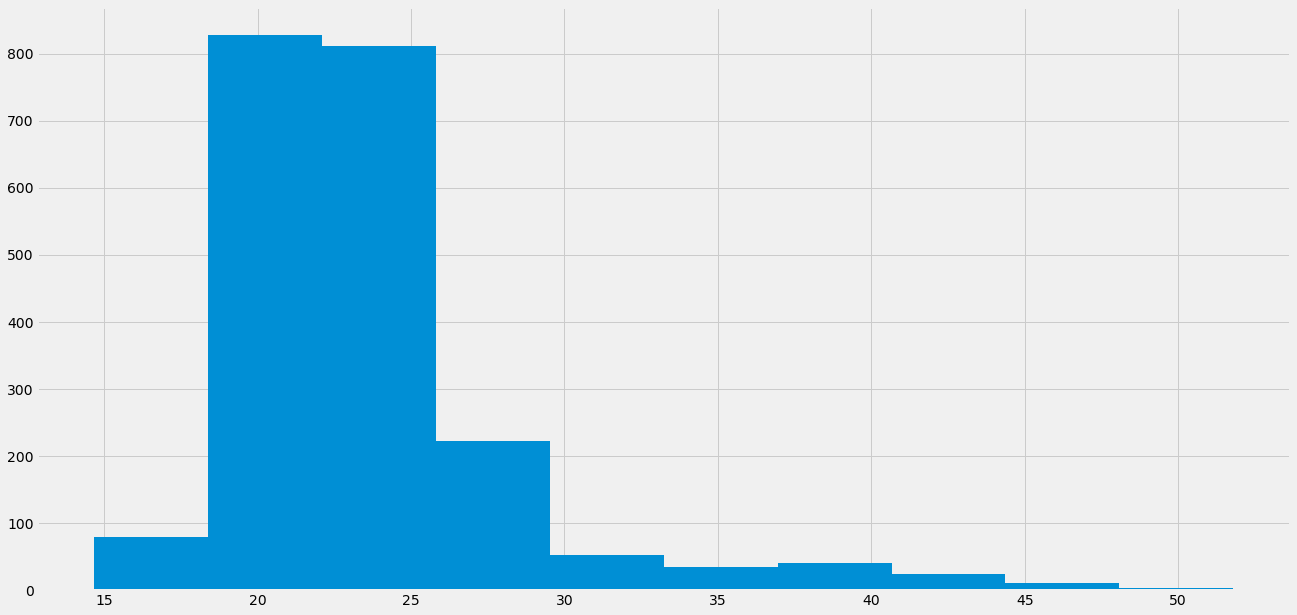

In [101]:
plt.figure(figsize=(20, 10))
weight_division_table_F.BMI.hist()

## Correlations

Text(0, 0.5, 'Height (cm)')

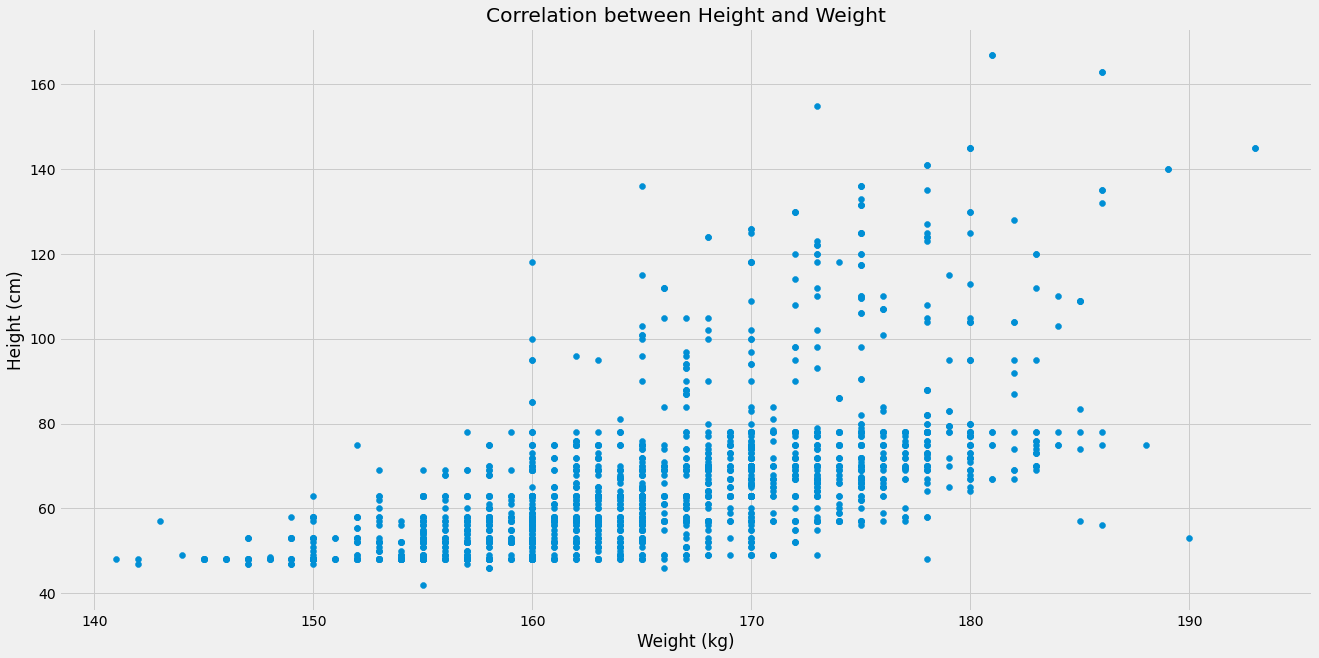

In [102]:
x_height = weight_division_table_F['Height']
y_weight = weight_division_table_F['Weight']
plt.figure(figsize=(20,10))
plt.scatter(x_height, y_weight)
plt.title('Correlation between Height and Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

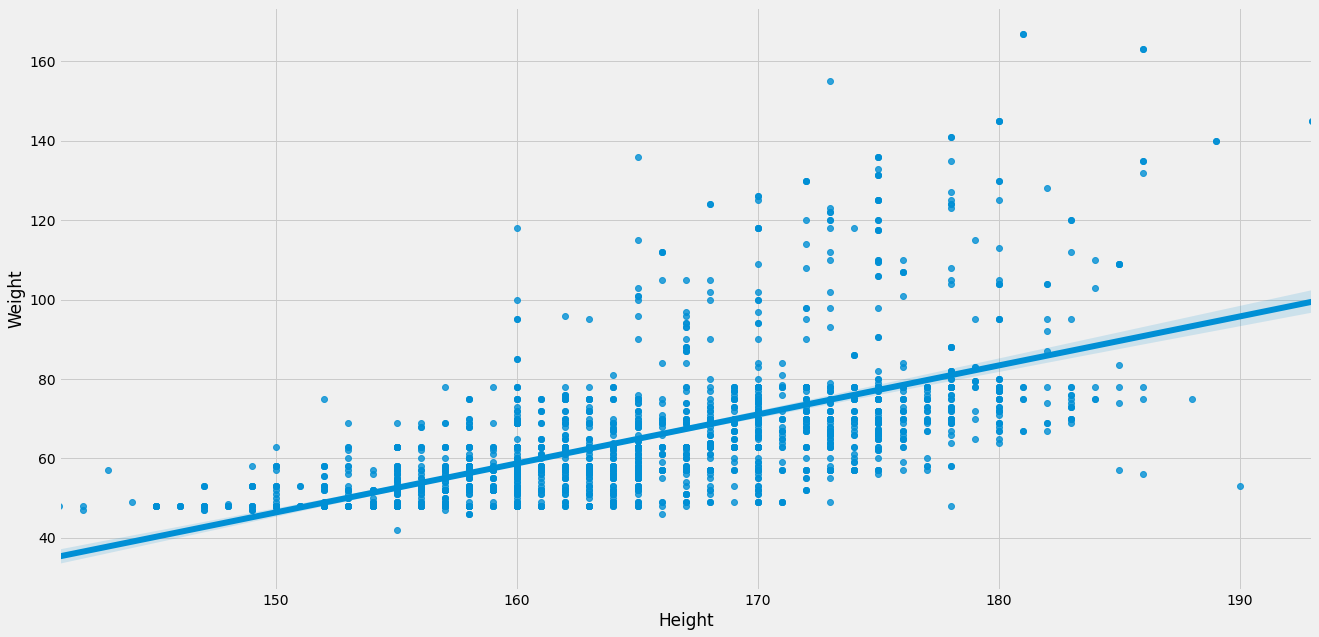

In [103]:
plt.figure(figsize=(20,10))
sns.regplot(x = 'Height', y = 'Weight', data = weight_division_table_F)

## Pearson

In [104]:
from scipy import stats
pearson, p_value = stats.pearsonr(weight_division_table_F['Height'], weight_division_table_F['Weight'])
print(f'pearson = {pearson}')
print(f'p_value = {p_value}')

pearson = 0.6079840875769498
p_value = 2.0848625294104456e-213


## ANOVA

#### weight_division_table FEMALE

In [127]:
weight_division_table_ANO = weight_division_table_F[['BMI', 'Medal_bool']]
weight_division_grouped = weight_division_table_ANO.groupby(['Medal_bool'])

weight_division_medal = weight_division_grouped.get_group('True')['BMI']
weight_division_NO_medal = weight_division_grouped.get_group('False')['BMI']

In [128]:
# Shapiro-Wilk normality test 
stats.shapiro(weight_division_medal), stats.shapiro(weight_division_NO_medal)

(ShapiroResult(statistic=0.7806748747825623, pvalue=2.8292127573278398e-24),
 ShapiroResult(statistic=0.7946470975875854, pvalue=1.716590618797901e-41))

In [129]:
plt.style.use('fivethirtyeight')

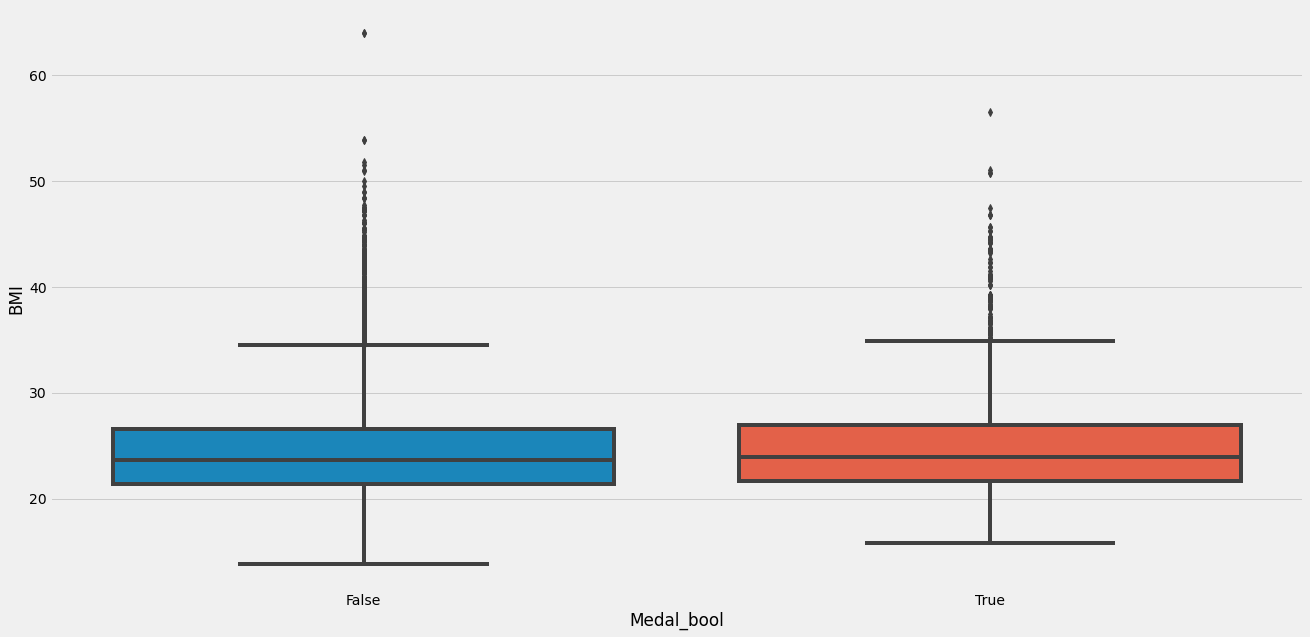

In [130]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Medal_bool', y = 'BMI', data = weight_division_table)

In [131]:
# Levene variance test  
stats.levene(weight_division_medal, weight_division_NO_medal)

LeveneResult(statistic=0.044711885681548574, pvalue=0.8325551490609926)

In [132]:
F, p = stats.f_oneway(weight_division_medal, weight_division_NO_medal)
print('F statistic = {:.4f}'.format(F))
print('p value = {:.4f}'.format(p))

F statistic = 0.6662
p value = 0.4145


In [133]:
weight_division_medal_label = pd.DataFrame(weight_division_medal.copy())
weight_division_medal_label['label'] = 'Medal'
weight_division_NO_medal_label = pd.DataFrame(weight_division_NO_medal.copy())
weight_division_NO_medal_label['label'] = 'No'

weight_division_ALL_label = pd.concat([weight_division_medal_label, weight_division_NO_medal_label])


In [134]:
import statsmodels.stats.multicomp as ml

mcobj = ml.MultiComparison(weight_division_ALL_label.BMI, weight_division_ALL_label.label)
out = mcobj.tukeyhsd(0.05) 

print(out)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
 Medal     No  -0.2088 0.4145 -0.7106 0.293  False
--------------------------------------------------


#### weight_division_table MALE

In [135]:
weight_division_table_ANO = weight_division_table_M[['BMI', 'Medal_bool']]
weight_division_grouped = weight_division_table_ANO.groupby(['Medal_bool'])

weight_division_medal = weight_division_grouped.get_group('True')['BMI']
weight_division_NO_medal = weight_division_grouped.get_group('False')['BMI']

In [136]:
# Shapiro-Wilk normality test 
stats.shapiro(weight_division_medal), stats.shapiro(weight_division_NO_medal)

/Users/luciomuramatsu/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9053884744644165, pvalue=4.1172900718156203e-35),
 ShapiroResult(statistic=0.9127197265625, pvalue=0.0))

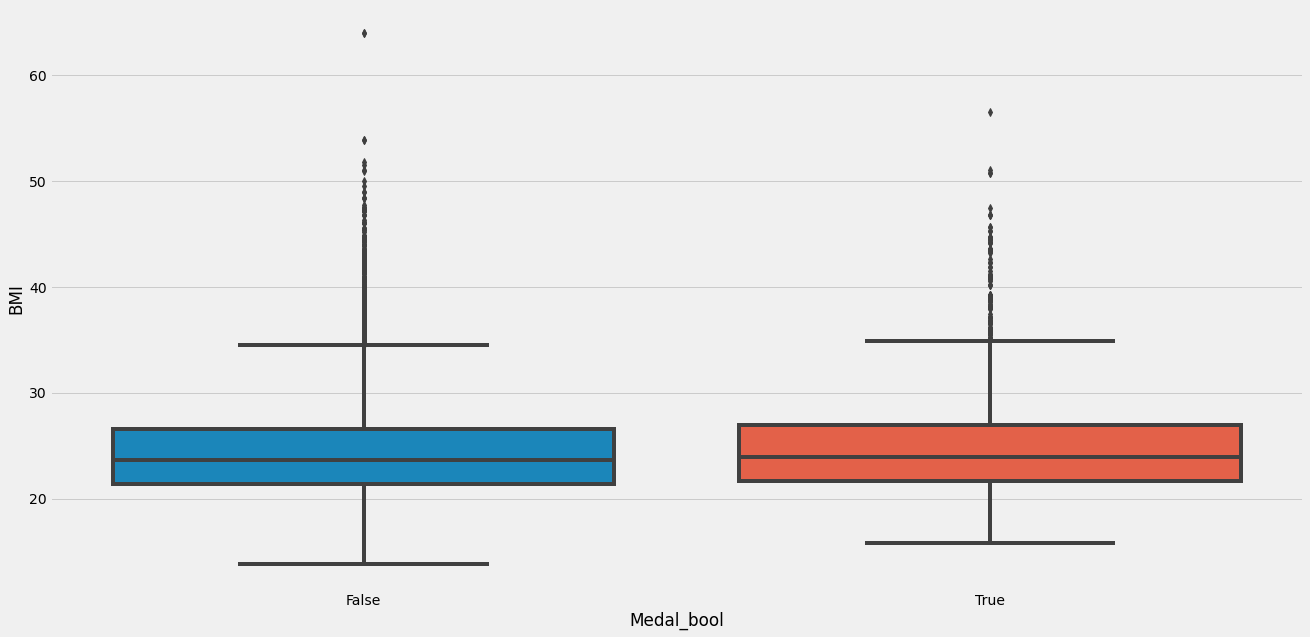

In [137]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Medal_bool', y = 'BMI', data = weight_division_table)

In [138]:
# Levene variance test  
stats.levene(weight_division_medal, weight_division_NO_medal)

LeveneResult(statistic=1.4231316230436646, pvalue=0.23290899382850405)

In [139]:
F, p = stats.f_oneway(weight_division_medal, weight_division_NO_medal)
print('F statistic = {:.4f}'.format(F))
print('p value = {:.4f}'.format(p))

F statistic = 15.0959
p value = 0.0001


In [140]:
weight_division_medal_label = pd.DataFrame(weight_division_medal.copy())
weight_division_medal_label['label'] = 'Medal'
weight_division_NO_medal_label = pd.DataFrame(weight_division_NO_medal.copy())
weight_division_NO_medal_label['label'] = 'No'

weight_division_ALL_label = pd.concat([weight_division_medal_label, weight_division_NO_medal_label])


In [141]:
import statsmodels.stats.multicomp as ml

mcobj = ml.MultiComparison(weight_division_ALL_label.BMI, weight_division_ALL_label.label)
out = mcobj.tukeyhsd(0.05) 

print(out)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Medal     No  -0.4245 0.001 -0.6386 -0.2103   True
---------------------------------------------------


#### team_table FEMALE

In [142]:
team_table_ANO = team_table_F[['BMI', 'Medal_bool']]
team_table_grouped = team_table_ANO.groupby(['Medal_bool'])

team_table_medal = team_table_grouped.get_group('True')['BMI']
team_table_NO_medal = team_table_grouped.get_group('False')['BMI']

In [143]:
# Shapiro-Wilk normality test 
stats.shapiro(team_table_medal), stats.shapiro(team_table_NO_medal)

/Users/luciomuramatsu/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9633694291114807, pvalue=2.1301530165440197e-24),
 ShapiroResult(statistic=0.9849855303764343, pvalue=3.2522548399833044e-23))

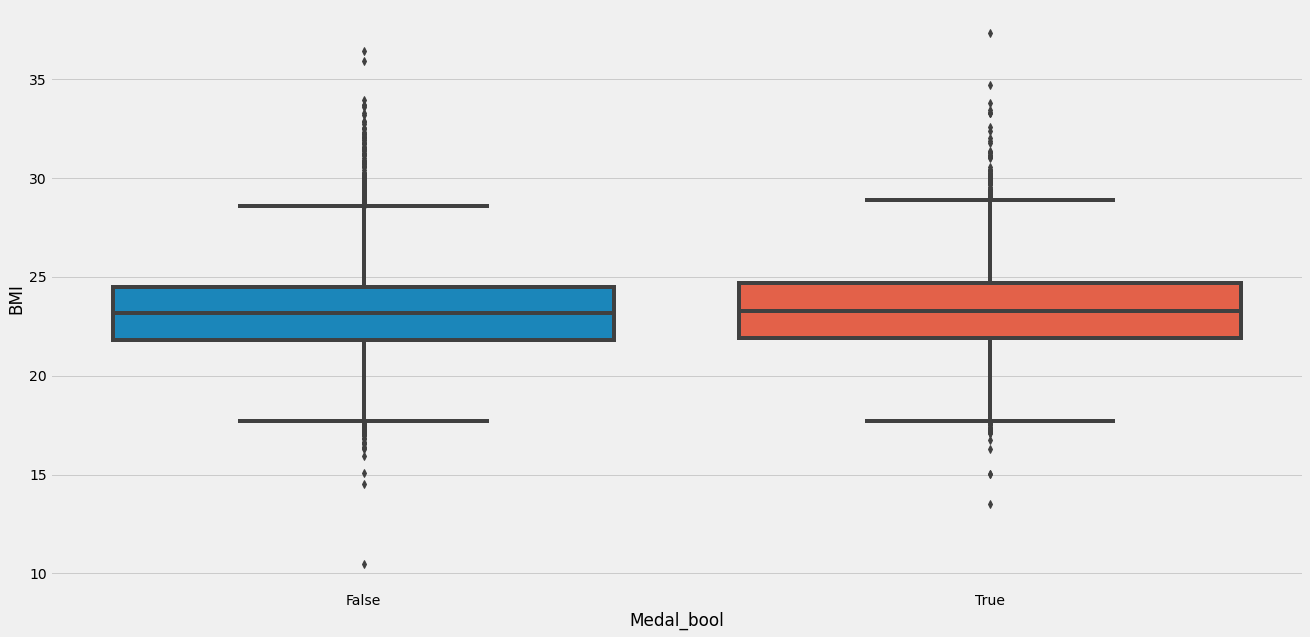

In [144]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Medal_bool', y = 'BMI', data = team_table)

In [145]:
# Levene variance test  
stats.levene(team_table_medal, team_table_NO_medal)

LeveneResult(statistic=0.09857578615463668, pvalue=0.7535539987675242)

In [146]:
F, p = stats.f_oneway(team_table_medal, team_table_NO_medal)
print('F statistic = {:.4f}'.format(F))
print('p value = {:.4f}'.format(p))

F statistic = 20.5362
p value = 0.0000


In [147]:
team_table_medal_label = pd.DataFrame(team_table_medal.copy())
team_table_medal_label['label'] = 'Medal'
team_table_NO_medal_label = pd.DataFrame(team_table_NO_medal.copy())
team_table_NO_medal_label['label'] = 'No'

team_table_ALL_label = pd.concat([team_table_medal_label, team_table_NO_medal_label])


In [148]:
mcobj = ml.MultiComparison(team_table_ALL_label.BMI, team_table_ALL_label.label)
out = mcobj.tukeyhsd(0.05) 

print(out)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Medal     No   -0.205 0.001 -0.2937 -0.1163   True
---------------------------------------------------


#### team_table MALE

In [149]:
team_table_ANO = team_table_M[['BMI', 'Medal_bool']]
team_table_grouped = team_table_ANO.groupby(['Medal_bool'])

team_table_medal = team_table_grouped.get_group('True')['BMI']
team_table_NO_medal = team_table_grouped.get_group('False')['BMI']

In [150]:
# Shapiro-Wilk normality test 
stats.shapiro(team_table_medal), stats.shapiro(team_table_NO_medal)

/Users/luciomuramatsu/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9780291318893433, pvalue=7.288964323715418e-24),
 ShapiroResult(statistic=0.9821889996528625, pvalue=3.4864444980575313e-35))

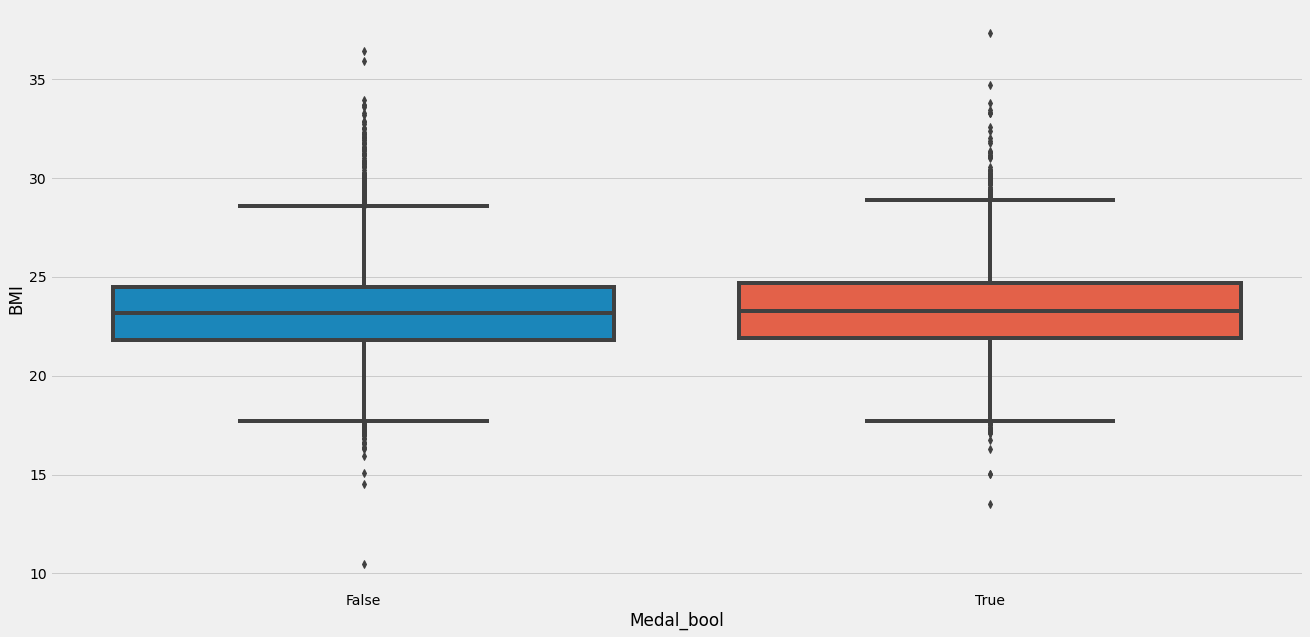

In [151]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Medal_bool', y = 'BMI', data = team_table)

In [152]:
# Levene variance test  
stats.levene(team_table_medal, team_table_NO_medal)

LeveneResult(statistic=0.7760727411887391, pvalue=0.37835896509625044)

In [153]:
F, p = stats.f_oneway(team_table_medal, team_table_NO_medal)
print('F statistic = {:.4f}'.format(F))
print('p value = {:.4f}'.format(p))

F statistic = 92.8439
p value = 0.0000


In [154]:
team_table_medal_label = pd.DataFrame(team_table_medal.copy())
team_table_medal_label['label'] = 'Medal'
team_table_NO_medal_label = pd.DataFrame(team_table_NO_medal.copy())
team_table_NO_medal_label['label'] = 'No'

team_table_ALL_label = pd.concat([team_table_medal_label, team_table_NO_medal_label])


In [155]:
mcobj = ml.MultiComparison(team_table_ALL_label.BMI, team_table_ALL_label.label)
out = mcobj.tukeyhsd(0.05) 

print(out)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
 Medal     No  -0.3474 0.001 -0.418 -0.2767   True
--------------------------------------------------


#### individual_table FEMALE

In [156]:
individual_table_ANO = individual_table_F[['BMI', 'Medal_bool']]
individual_table_grouped = individual_table_ANO.groupby(['Medal_bool'])

individual_table_medal = individual_table_grouped.get_group('True')['BMI']
individual_table_NO_medal = individual_table_grouped.get_group('False')['BMI']

In [157]:
# Shapiro-Wilk normality test 
stats.shapiro(individual_table_medal), stats.shapiro(individual_table_NO_medal)

/Users/luciomuramatsu/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9478874206542969, pvalue=7.791929919967396e-39),
 ShapiroResult(statistic=0.9231413006782532, pvalue=0.0))

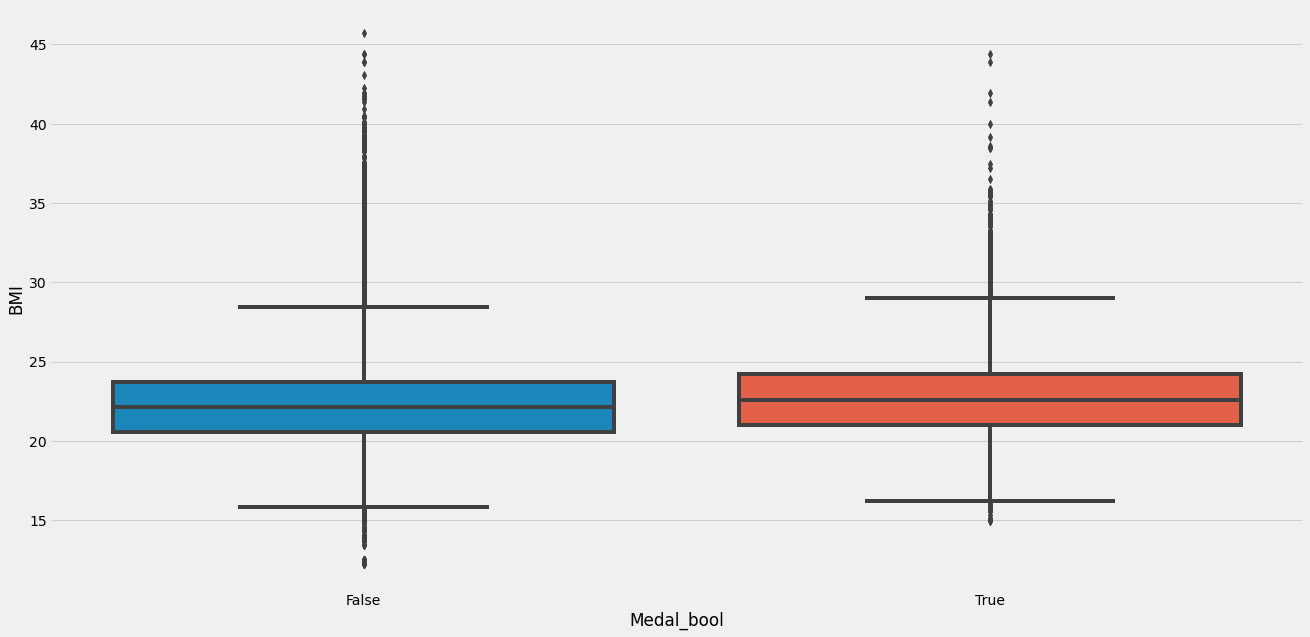

In [158]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Medal_bool', y = 'BMI', data = individual_table)

In [159]:
# Levene variance test  
stats.levene(individual_table_medal, individual_table_NO_medal)

LeveneResult(statistic=1.4614915001863331, pvalue=0.22670026555136782)

In [160]:
F, p = stats.f_oneway(individual_table_medal, individual_table_NO_medal)
print('F statistic = {:.4f}'.format(F))
print('p value = {:.4f}'.format(p))

F statistic = 182.6636
p value = 0.0000


In [161]:
individual_table_medal_label = pd.DataFrame(individual_table_medal.copy())
individual_table_medal_label['label'] = 'Medal'
individual_table_NO_medal_label = pd.DataFrame(individual_table_NO_medal.copy())
individual_table_NO_medal_label['label'] = 'No'

individual_table_ALL_label = pd.concat([individual_table_medal_label, individual_table_NO_medal_label])


In [162]:
mcobj = ml.MultiComparison(individual_table_ALL_label.BMI, individual_table_ALL_label.label)
out = mcobj.tukeyhsd(0.05) 

print(out)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Medal     No   -0.492 0.001 -0.5633 -0.4206   True
---------------------------------------------------


#### individual_table MALE

In [163]:
individual_table_ANO = individual_table_M[['BMI', 'Medal_bool']]
individual_table_grouped = individual_table_ANO.groupby(['Medal_bool'])

individual_table_medal = individual_table_grouped.get_group('True')['BMI']
individual_table_NO_medal = individual_table_grouped.get_group('False')['BMI']

In [164]:
# Shapiro-Wilk normality test 
stats.shapiro(individual_table_medal), stats.shapiro(individual_table_NO_medal)

/Users/luciomuramatsu/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9357399344444275, pvalue=0.0),
 ShapiroResult(statistic=0.915174126625061, pvalue=0.0))

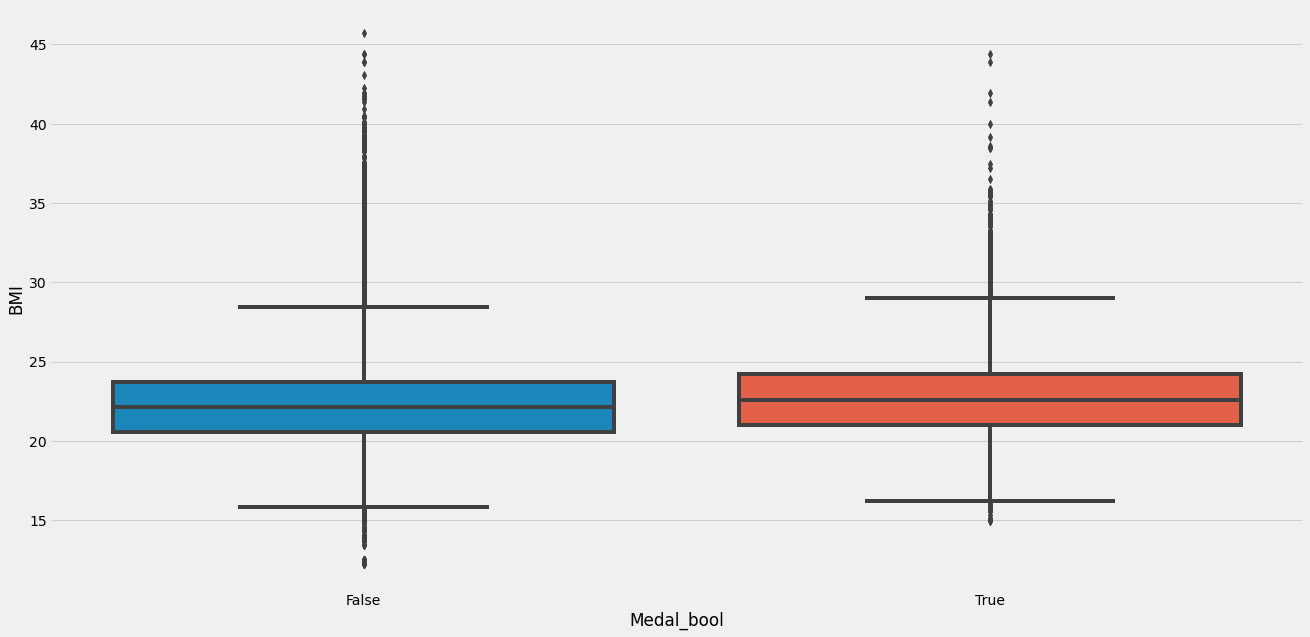

In [165]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Medal_bool', y = 'BMI', data = individual_table)

In [166]:
# Levene variance test  
stats.levene(individual_table_medal, individual_table_NO_medal)

LeveneResult(statistic=3.1361135244102902, pvalue=0.07658025105433368)

In [167]:
F, p = stats.f_oneway(individual_table_medal, individual_table_NO_medal)
print('F statistic = {:.4f}'.format(F))
print('p value = {:.4f}'.format(p))

F statistic = 215.5374
p value = 0.0000


In [168]:
individual_table_medal_label = pd.DataFrame(individual_table_medal.copy())
individual_table_medal_label['label'] = 'Medal'
individual_table_NO_medal_label = pd.DataFrame(individual_table_NO_medal.copy())
individual_table_NO_medal_label['label'] = 'No'

individual_table_ALL_label = pd.concat([individual_table_medal_label, individual_table_NO_medal_label])


In [169]:
mcobj = ml.MultiComparison(individual_table_ALL_label.BMI, individual_table_ALL_label.label)
out = mcobj.tukeyhsd(0.05) 

print(out)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
 Medal     No  -0.4376 0.001 -0.496 -0.3792   True
--------------------------------------------------


## Linear Regression

In [191]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

x_lm = individual_table[['BMI', 'Age']]
y_lm = individual_table['Medal_num']
lm.fit(x_lm, y_lm)
lm.score(x_lm, y_lm)

0.001769108885129489

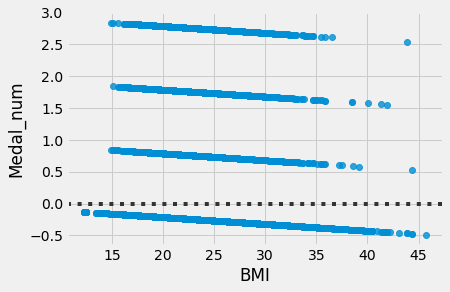

In [185]:
sns.residplot( individual_table['BMI'],  individual_table['Medal_num'])

In [186]:
Yhat = lm.predict(x_lm)
Yhat

lm.intercept_

lm.coef_

array([0.01073223])

/Users/luciomuramatsu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


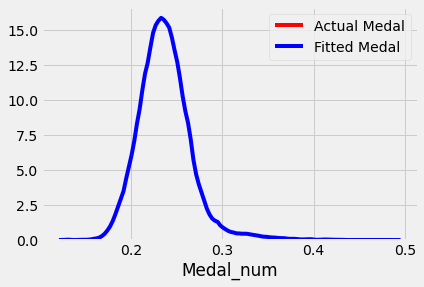

In [190]:
ax1 = sns.distplot(individual_table['Medal_num'], hist = False, color = "r", label = "Actual Medal")
sns.distplot(Yhat, hist = False, color = "b", label = "Fitted Medal", ax=ax1)